<!--
---
title: "Exploratory Data Analysis (EDA) for Regression"
author: "Darya Vanichkina, David Kohn"
keypoints: 
- EDA is the first step of any analysis, and often very time consuming.
- Skipping EDA can result in substantial issues with subsequent analysis.
questions:
- How do we predict one continuous variable based on others?
- What is the first step of any ML project (and often the most time consuming)?
objectives:
- Introduce some of the key packages for EDA and ML
- Introduce and explore the Ames Housing dataset
source: Rmd
teaching: 30
exercises: 30
bibliography: references.bib
---
-->

### Exploratory Data Analysis (EDA) for Regression

First, let’s load the required libraries. We will use the sklearn library for our ML tasks, and the pandas, numpy, matplotlib and seaborn libraries for general data processing and visualisation.

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
# pip install UpSetPlot #no conda option??
# import upsetplot
%matplotlib inline
sns.set(font_scale = 1.5)

## Load the data

We will use the Ames housing data to explore different ML approaches to regression. This dataset was “designed” by Dean De Cock as an alternative to the “classic” Boston housing dataset, and has been extensively used in ML teaching. It is also available from kaggle as part of its [advanced regression practice competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

The Ames Housing [Data Documentation file](https://github.sydney.edu.au/informatics/lessons-mlr/blob/gh-pages/_episodes_rmd/data/AmesHousing_DataDocumentation.txt) describes the independent variables presented in the data. This includes:

- 20 continuous variables relate to various area dimensions for each observation
- 14 discrete variables, which typically quantify the number of items occurring within the house
- 23 ordinal, 23 nominal categorical variables, with 2 (STREET: gravel or paved) - 28 (NEIGHBORHOOD) classes

We will explore both the “uncleaned” data available from kaggle/UCI, and the processed data available in the AmesHousing package in R, for which documentation is available [here](https://cran.r-project.org/web/packages/AmesHousing/AmesHousing.pdf). It can be useful for understanding what each of the independent variables mean.

In [25]:
ameshousingClean = pd.read_csv('data/AmesHousingClean.csv')
ameshousingDirty = pd.read_csv('data/AmesHousingDirty.csv')

## Exploratory data analysis

Exploratory data analysis involves looking at:

- the distribution of variables in your dataset
- whether any data is missing
- skewed
- correlated variables

> ## Challenge
>
> 1. Explore the Ames Housing dataset. What can you figure out about the different variables? 
> Which do you think are more or less important?
> 
> 2. Compare the "Clean" and "Dirty" datasets:
> - What was missing in the raw data?
> - What are some of the approaches that have been taken to deal with missingness?
> 
> {: .source}
>
> > ## Solution
> > print(ameshousingClean.shape)
> > 
> > print(ameshousingDirty.shape)
> > 
> > Let's now proceed to explore the rest of the answers to this challenge.
> >
> > {: .output}
> {: .solution}
{: .challenge}

What are the dimensions of the data?

Look at the data:

In [26]:
ameshousingClean.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


What types are each of the columns?

In [27]:
ameshousingClean.dtypes

MS_SubClass            object
MS_Zoning              object
Lot_Frontage            int64
Lot_Area                int64
Street                 object
Alley                  object
Lot_Shape              object
Land_Contour           object
Utilities              object
Lot_Config             object
Land_Slope             object
Neighborhood           object
Condition_1            object
Condition_2            object
Bldg_Type              object
House_Style            object
Overall_Qual           object
Overall_Cond           object
Year_Built              int64
Year_Remod_Add          int64
Roof_Style             object
Roof_Matl              object
Exterior_1st           object
Exterior_2nd           object
Mas_Vnr_Type           object
Mas_Vnr_Area            int64
Exter_Qual             object
Exter_Cond             object
Foundation             object
Bsmt_Qual              object
                       ...   
Kitchen_AbvGr           int64
Kitchen_Qual           object
TotRms_Abv

Get information about index type and column types, non-null values and memory usage.

In [28]:
ameshousingClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
MS_SubClass           2930 non-null object
MS_Zoning             2930 non-null object
Lot_Frontage          2930 non-null int64
Lot_Area              2930 non-null int64
Street                2930 non-null object
Alley                 2930 non-null object
Lot_Shape             2930 non-null object
Land_Contour          2930 non-null object
Utilities             2930 non-null object
Lot_Config            2930 non-null object
Land_Slope            2930 non-null object
Neighborhood          2930 non-null object
Condition_1           2930 non-null object
Condition_2           2930 non-null object
Bldg_Type             2930 non-null object
House_Style           2930 non-null object
Overall_Qual          2930 non-null object
Overall_Cond          2930 non-null object
Year_Built            2930 non-null int64
Year_Remod_Add        2930 non-null int64
Roof_Style            2930 non-null o

Compare with "non-clean" dataset

In [29]:
ameshousingDirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

Explore how many null values are in the clean dataset

In [30]:
ameshousingClean.isnull().sum(axis = 0)

MS_SubClass           0
MS_Zoning             0
Lot_Frontage          0
Lot_Area              0
Street                0
Alley                 0
Lot_Shape             0
Land_Contour          0
Utilities             0
Lot_Config            0
Land_Slope            0
Neighborhood          0
Condition_1           0
Condition_2           0
Bldg_Type             0
House_Style           0
Overall_Qual          0
Overall_Cond          0
Year_Built            0
Year_Remod_Add        0
Roof_Style            0
Roof_Matl             0
Exterior_1st          0
Exterior_2nd          0
Mas_Vnr_Type          0
Mas_Vnr_Area          0
Exter_Qual            0
Exter_Cond            0
Foundation            0
Bsmt_Qual             0
                     ..
Kitchen_AbvGr         0
Kitchen_Qual          0
TotRms_AbvGrd         0
Functional            0
Fireplaces            0
Fireplace_Qu          0
Garage_Type           0
Garage_Finish         0
Garage_Cars           0
Garage_Area           0
Garage_Qual     

What about in the original?

In [31]:
ameshousingDirty.isnull().sum(axis = 0)

Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Alley             2732
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual

Find out what's the top missing:

In [32]:
missingNo = ameshousingDirty.isnull().sum(axis = 0).sort_values(ascending = False)
missingNo = missingNo[missingNo.values  > 0]
missingNo

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Yr Blt      159
Garage Cond        159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
BsmtFin Type 1      80
Bsmt Cond           80
Bsmt Qual           80
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
Garage Area          1
Garage Cars          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Electrical           1
dtype: int64

Plot that missingness

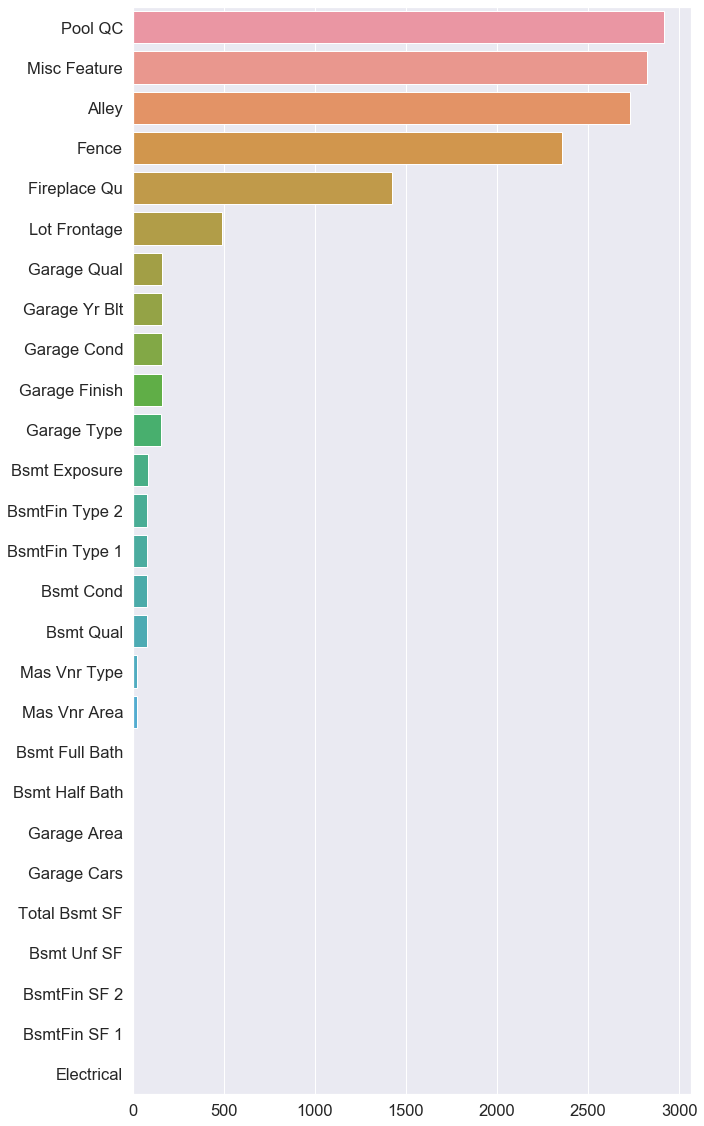

In [33]:
f, ax = plt.subplots(figsize = (10, 20))
sns.barplot(missingNo.values, missingNo.index, ax = ax)

In [34]:
# future: upsetplot for missingness - FIXME
# upsetplot.plot()
# ref https://upsetplot.readthedocs.io/en/stable/_examples/plot_boston.html#sphx-glr-examples-plot-boston-py

> ### Challenge: Missingness
>
> Compare the entries in the "clean" and "dirty" data frames. How was the data cleaned up?

>
> 
> {: .source}
>
> > ## Solution
> > 
> > ~~~
> > # poolQC
> > print(ameshousingDirty['Pool QC'].value_counts())
> > print(ameshousingClean['Pool_QC'].value_counts())
> > # Misc Feature
> > print(ameshousingDirty['Misc Feature'].value_counts())
> > print(ameshousingClean['Misc_Feature'].value_counts())
> > # Alley
> > print(ameshousingDirty['Alley'].value_counts())
> > print(ameshousingClean['Alley'].value_counts())
> > # Fence              2358
> > print(ameshousingDirty['Fence'].value_counts())
> > print(ameshousingClean['Fence'].value_counts())
> > # Fireplace Qu       1422
> > print(ameshousingDirty['Fireplace Qu'].value_counts())
> > print(ameshousingClean['Fireplace_Qu'].value_counts())
> > # Lot Frontage        490
> > print(ameshousingDirty['Lot Frontage'].describe())
> > print(ameshousingClean['Lot_Frontage'].describe())
> > # Garage Qual         159
> > print(ameshousingDirty['Garage Qual'].value_counts())
> > print(ameshousingClean['Garage_Qual'].value_counts())
> > ~~~
> > 
> > {: .output}
> {: .solution}
{: .challenge}

***
## Explore the data to see whether there are any unusual relationships between variables 

#### Pull out numeric and categoric variables:

1. What data types do I have in my data? Can I infer that some of them are categorical, and others are not?

In [35]:
ameshousingClean.dtypes.value_counts()

object     46
int64      33
float64     2
dtype: int64

2. Pull out the categorical and numerical variables

In [36]:
catVars = ameshousingClean.select_dtypes(include = ['object']).columns
numericVars = ameshousingClean.select_dtypes(exclude = ['object']).columns

3. Plot the first 11 numerical variables, and their relationship with sale price

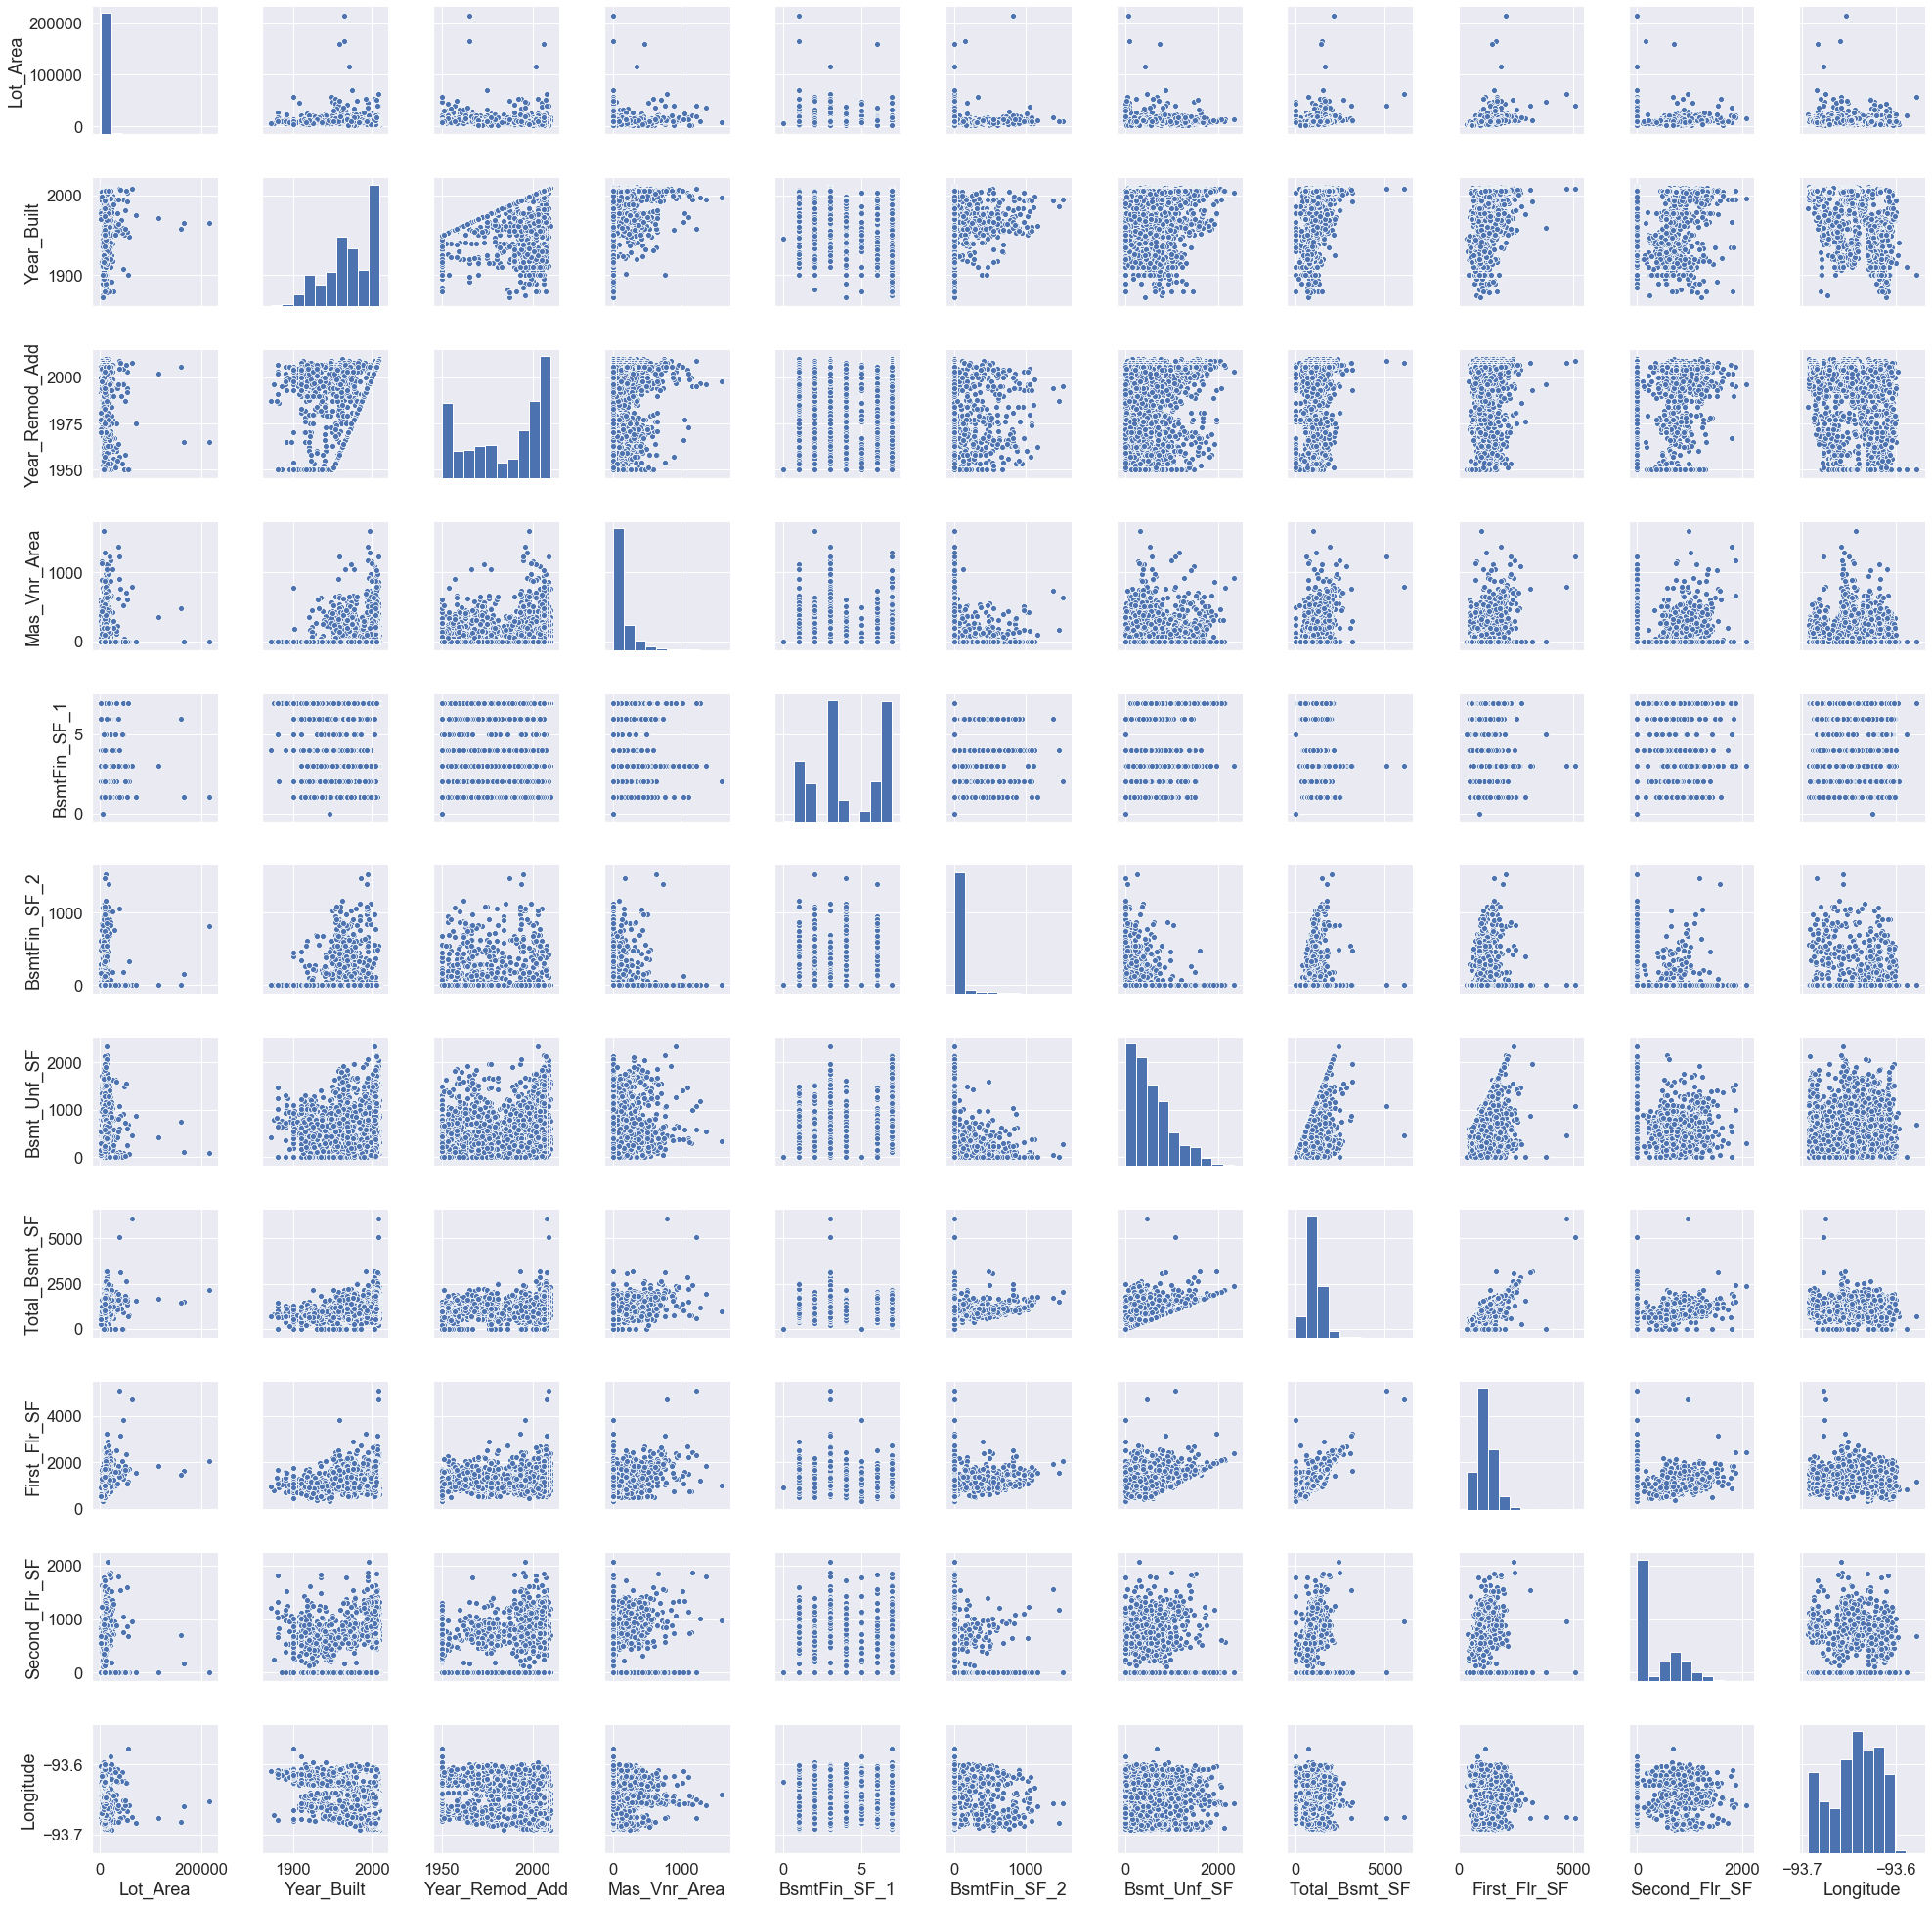

In [37]:
sns.pairplot(
    ameshousingClean,
    vars = numericVars[np.append(np.arange(1, 11), 33)]
)

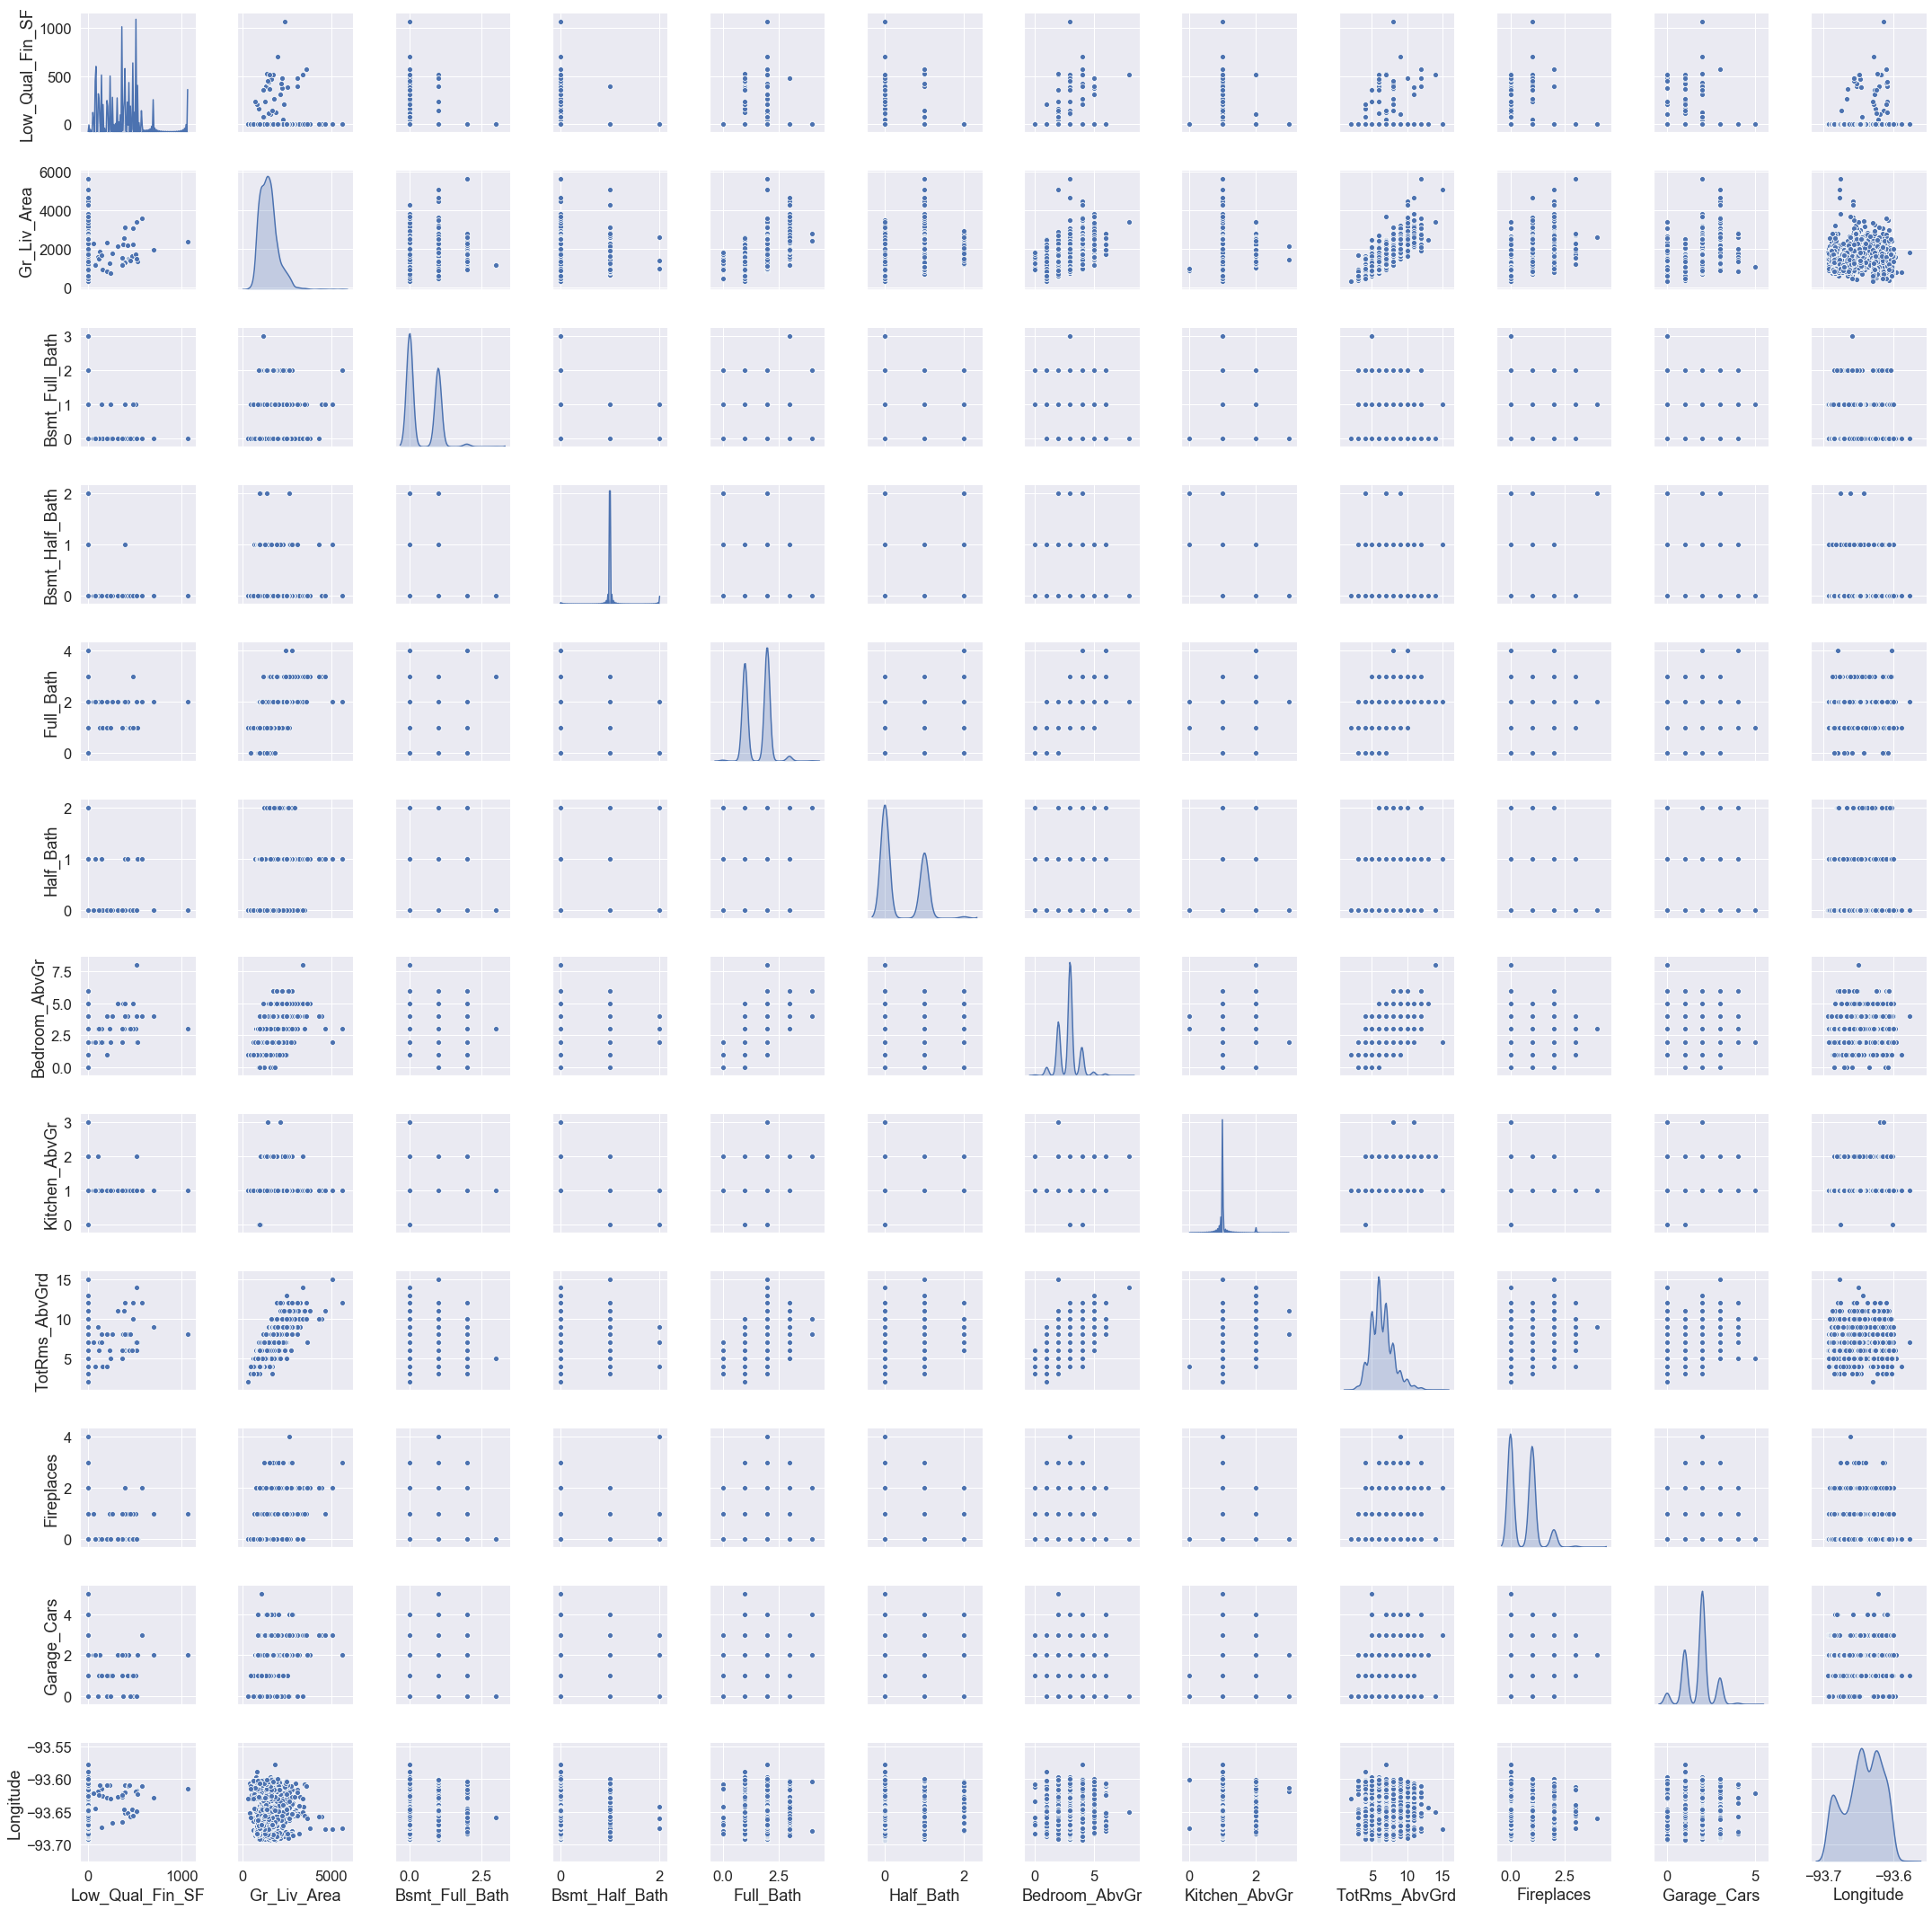

In [38]:
sns.pairplot(
    ameshousingClean,
    diag_kind="kde",
    vars = numericVars[np.append(np.arange(11, 22), 33)])

Of the numeric variables, which ones are the most correlated (with Sale price, and, more critically, with each other)?
> ## Challenge
>
> What variables are the most correlated with SalePrice?
>
> 
> {: .source}
>
> > ## Solution
> > 
> > ~~~
> > 
> > ameshousingClean[list(numericVars)].corr().round(2).sort_values('Sale_Price', ascending = False)['Sale_Price']
> > 
> > ~~~
> > 
> > {: .output}
> {: .solution}
{: .challenge}




Now generate a correlation plot to visualise this relationship

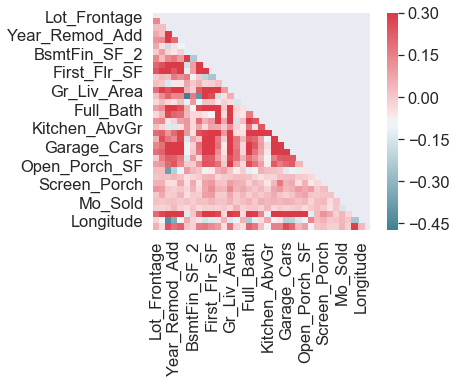

In [39]:
corr = ameshousingClean[numericVars].corr()
rs = np.random.RandomState(33)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, square=True)

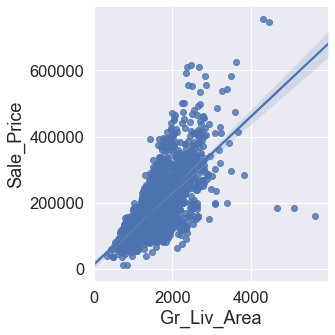

In [40]:
sns.lmplot(
    data = ameshousingClean,
    x = 'Gr_Liv_Area', y = 'Sale_Price'
)

### Explore distribution of Outcome variable

You also need to do EDA on the outcome variable to:

- identify outliers
- explore whether there is any skew in its distribution, and possibly identify a transformation to use when modelling the data

This is because many models, including ordinary linear regression, assume that prediction errors (and hence the response) are normally distributed.

Can you see any outliers in the data? Arguably, the five points on the right, wtih Gr_Liv_Area > 4000, are outliers, that can significantly affect the fit of our model. We will filter these out prior to modelling:

In [41]:
ameshousingClean = ameshousingClean.loc[ameshousingClean['Gr_Liv_Area'] <= 4000, :]

> The next 2 plots do not need to be demonstrated in class, but are here as notes

You can also use violin and box plots to explore the relationship between categorical variables and the Outcome

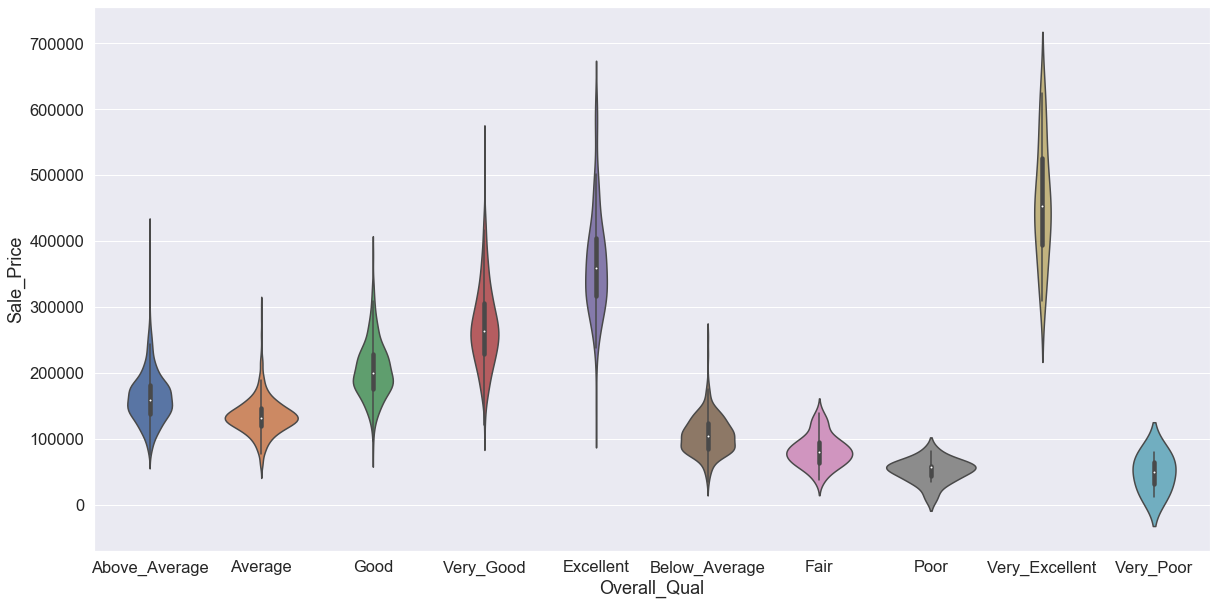

In [42]:
# skip while teaching
f, ax = plt.subplots(figsize = (20, 10))
sns.violinplot(
    x = 'Overall_Qual',
    y = 'Sale_Price',
    data = ameshousingCleanFiltered,
    ax = ax
)

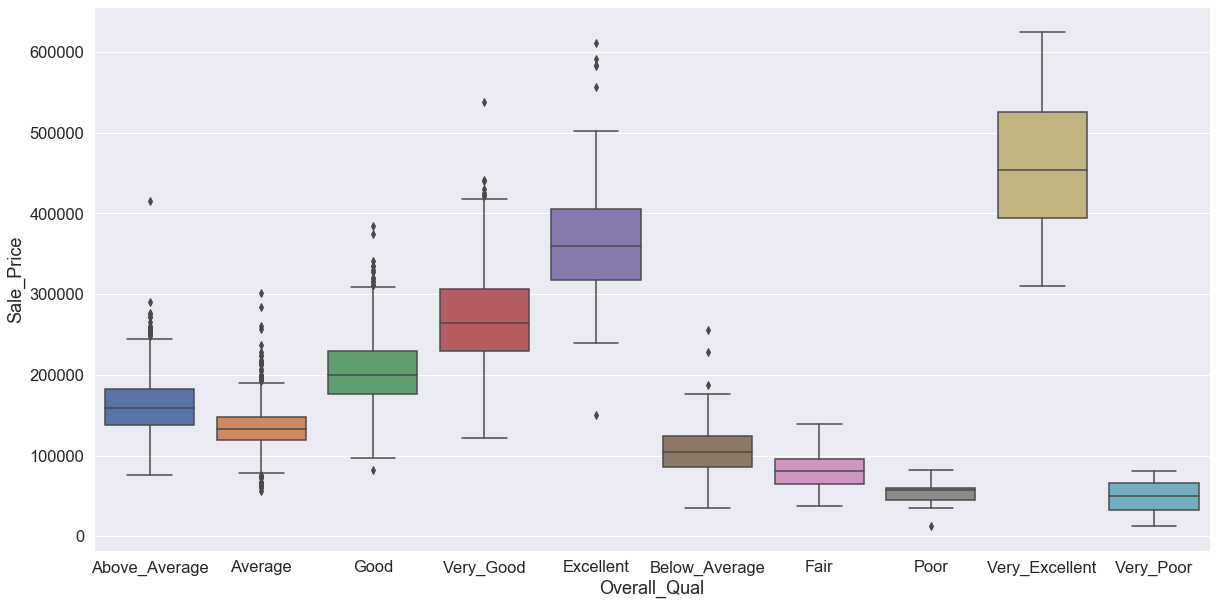

In [43]:
# skip while teaching
f, ax = plt.subplots(figsize = (20, 10))
sns.boxplot(
    x = 'Overall_Qual',
    y = 'Sale_Price',
    data = ameshousingCleanFiltered,
    ax = ax
)

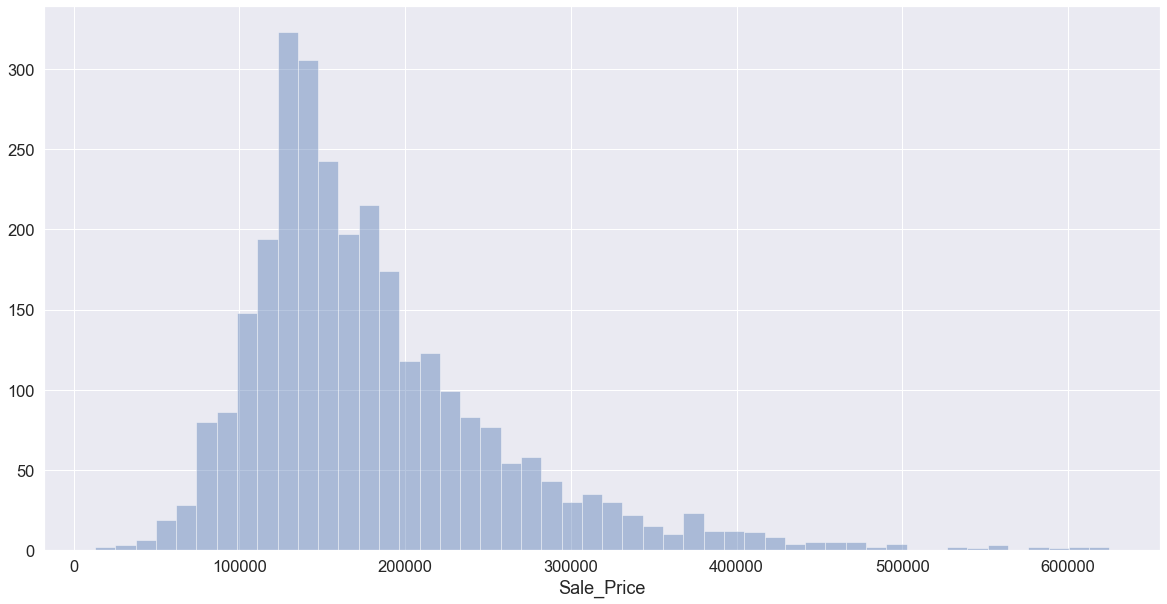

In [44]:
# DO INCLUDE this one though
f, ax = plt.subplots(figsize = (20, 10))
sns.distplot(
    ameshousingCleanFiltered['Sale_Price'],
    kde = False,
    ax = ax
)

Explore different ways of transforming the Sale Price.

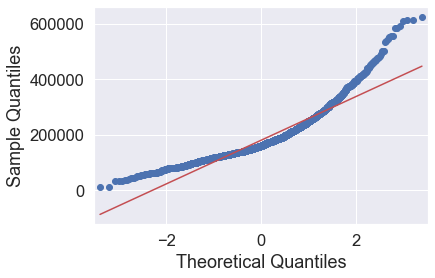

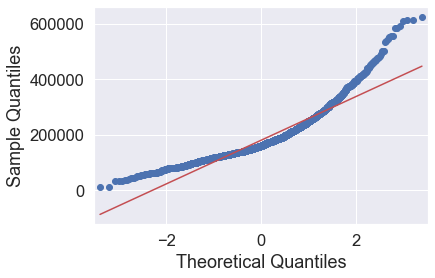

In [45]:
# raw data
sm.qqplot(
    ameshousingCleanFiltered['Sale_Price'],
    line = 's'
)

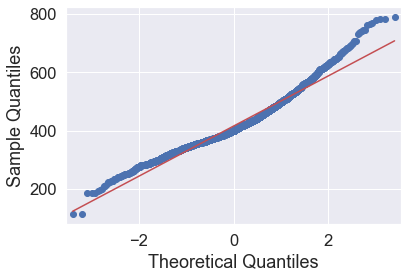

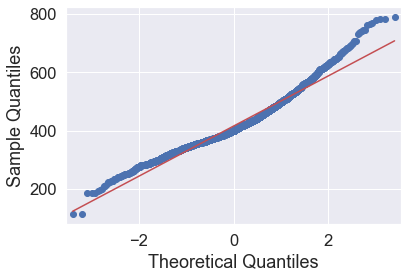

In [46]:
# sqrt transformation
sm.qqplot(
    np.sqrt(ameshousingCleanFiltered['Sale_Price']),
    line = 's'
)

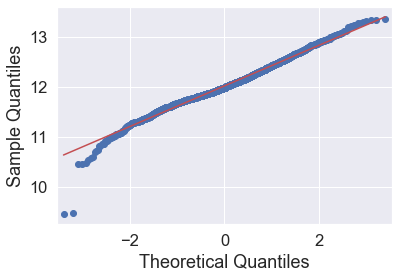

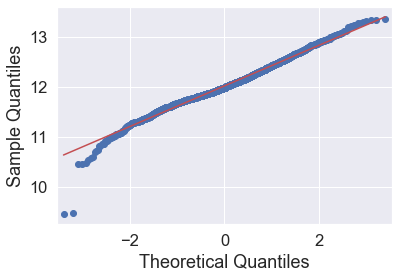

In [47]:
# log transform
sm.qqplot(
    np.log(ameshousingCleanFiltered['Sale_Price']),
    line = 's'
)

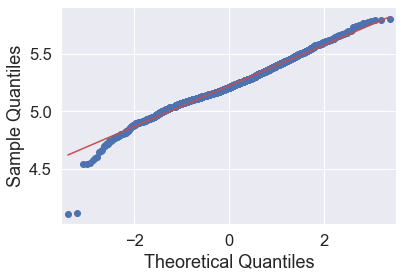

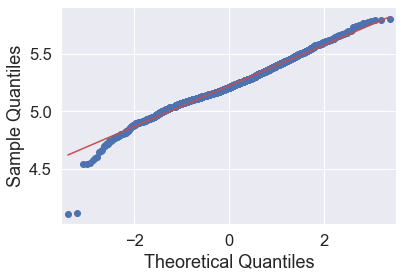

In [48]:
# log10 transform
sm.qqplot(
    np.log10(ameshousingCleanFiltered['Sale_Price']),
    line = 's'
)

> ## Challenge
>
> If you were working with this dataset, which of the above would you prefer?
>
> 
> {: .source}
>
> > ## Solution
> > 
> > The log10 transformation seems best, as it both helps the distribution look more normal and
> > helps keep our error metrics and final predictions easily interpretable.
> > It also means that the errors of predicting the values of inexpensive 
> > and expensive houses will affect the prediction equally. 
> > 
> > {: .output}
> {: .solution}
{: .challenge}
